# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [130]:
import math
import sys

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

### Chose the IRIS Dataset for project analysis

In [132]:
# Import Dataset and display random 10 rows

url_link = "https://github.com/EpistasisLab/pmlb/raw/master/datasets/iris/iris.tsv.gz"
iris_df = pd.read_csv(url_link, sep = "\t")

iris_df.sample(10, random_state = 18)

,sepal-length,sepal-width,petal-length,petal-width,target
81,6.6,3.0,4.4,1.4,1
92,5.7,2.5,5.0,2.0,2
80,6.1,2.8,4.0,1.3,1
4,7.2,3.0,5.8,1.6,2
30,6.7,3.1,5.6,2.4,2
24,6.5,2.8,4.6,1.5,1
129,5.7,3.0,4.2,1.2,1
41,4.9,3.1,1.5,0.1,0
102,4.9,3.1,1.5,0.1,0
87,4.7,3.2,1.3,0.2,0


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [133]:
# Dataset Columns

iris_df.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'], dtype='object')

#### Basic Terms

<ins>**Sepal**</ins> = The sepal is the outer part of a flower, and is usually green and leaf-like. The main objective of the sepal is protection, it is responsible in shielding the bud before the flower opens.

<ins>**Petal**</ins> = The petal is the inner, colorful part of the flower that we tend to notice at first glance. It's main role is attraction, petals draw in bees and butterflies with their color and shape, which helps in pollination.

#### Columns in the Iris Dataset

**<ins>sepal-length**</ins> = The length of the sepal and it is measured in cm. This gives us an rough estimate about the overall size of the flower.

**<ins>sepal-width**</ins> = The width of the sepal and it is measured in cm. This feature helps us distinguish between broader and narrower sepals.

**<ins>petal-length**</ins> = The length of the petal and it is measured in cm. Across species, the petal size varies greatly and this feature will help in distinguishing species.

**<ins>petal-width**</ins> = The width of the petal and it is measured in cm. This feature also helps to distinguish between flower species.

**<ins>target**</ins> = The species label of the iris flower. It is encoded as numbers:

(a) 0 = **<ins>Iris Setosa**</ins>

(b) 1 = **<ins>Iris Versicolour**</ins>

(c) 2 = **<ins>Iris Virginica**</ins>

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

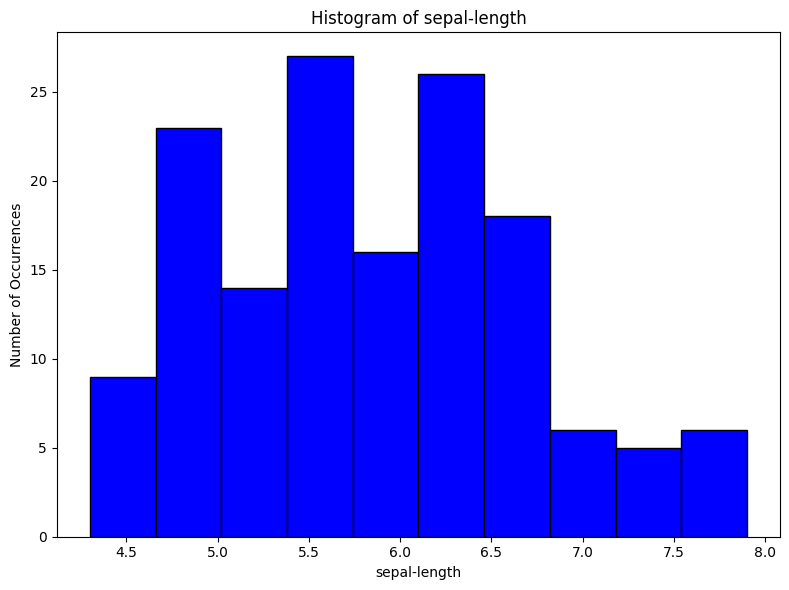

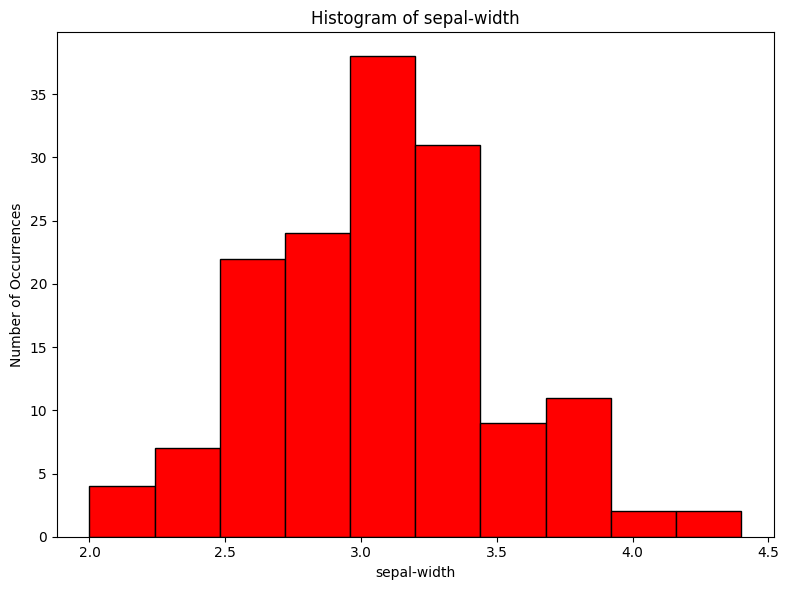

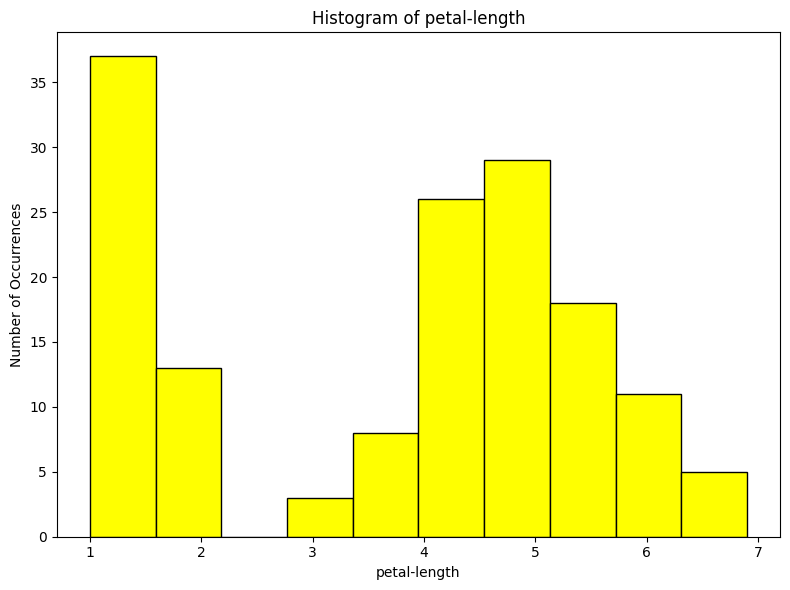

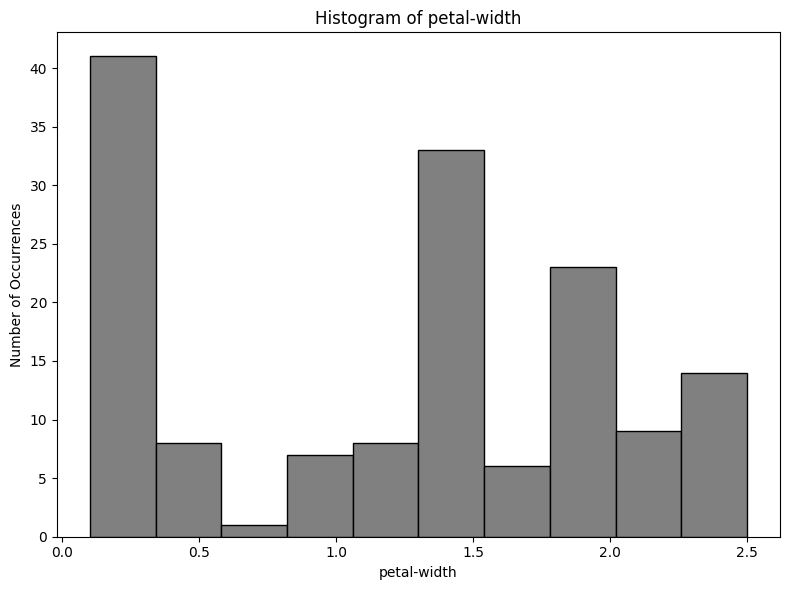

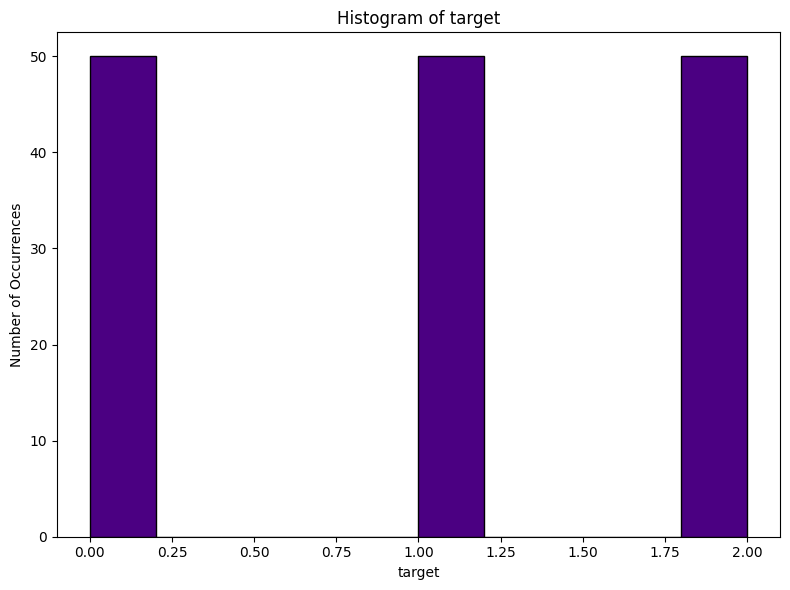

In [134]:
# Histograms of all columns

colors = ["blue","red","yellow","grey","indigo"]
for i,col in enumerate(iris_df.columns):
    plt.figure(figsize=(8,6))
    plt.hist(iris_df[col], color=colors[i], edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Occurrences")
    plt.tight_layout()
    plt.show()

### Let's discuss the distribution of each column.

##### 1) <ins>**sepal-length**</ins>
a) Seems to be a normal distribution with a slight right skew. This is because the values mostly occurs in the middle of the histogram and the histogram tapers at the tails.

b) Most of the values are between 5.5 and 6.5 with no visible outliers.

##### 2) <ins>**sepal-width**</ins>
a) It is a normal distribution with almost perfect bell shape.

b) Peak is at 3.0

c) Could have an outlier at range 4.0 -4.5

##### 3) <ins>**petal-length**</ins>
a) Seems to be a bimodal distribution as it looks like a mixture of two normal distributions.

b) It has 2 peaks, one between 1.0 - 2.0 cm and another between 4.0 - 5.0 cm.

##### 4) <ins>**petal-width**</ins>
a) Seems to be a bimodal distribution as it looks like a mixture of two normal distributions.

b) It has 2 peaks, one between 0.0 - 0.4 cm and another near 1.5 cm.

##### 5) <ins>**Target**</ins>
a) It is a Uniform distribution with 3 categorical values (0,1,2).

b) Each class (0,1,2) appears 50 times exactly.


### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

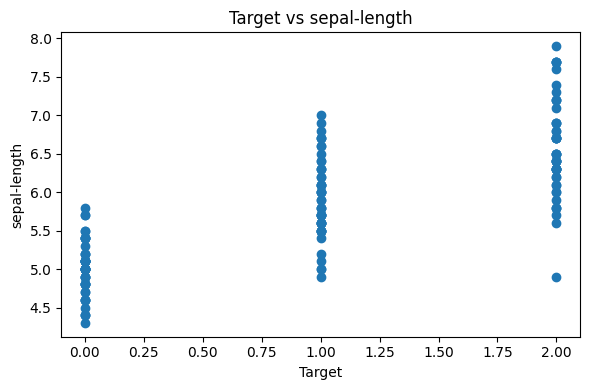

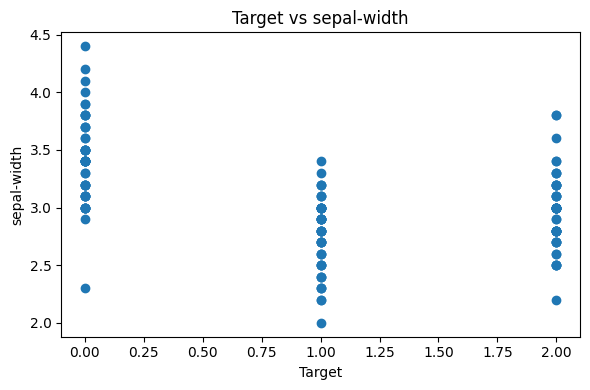

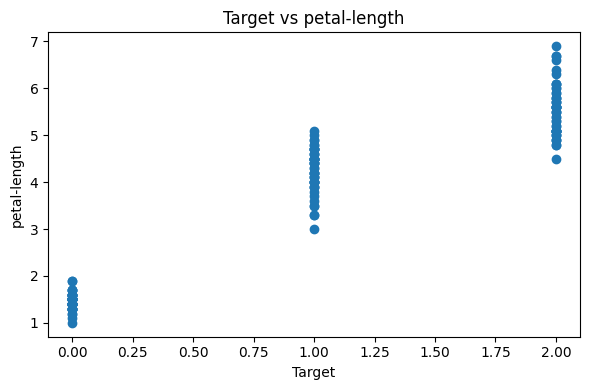

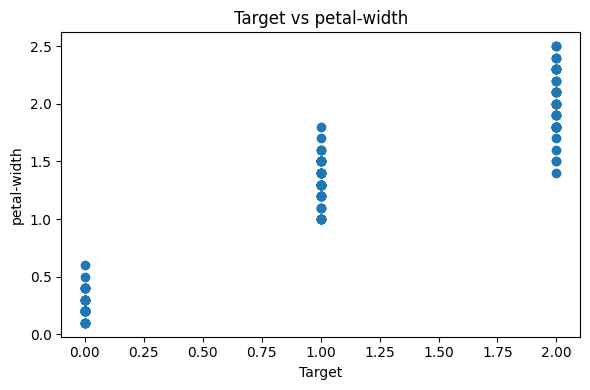

In [135]:
# Target vs Input Columns

for col in iris_df.columns[:-1]:
    plt.figure(figsize=(6,4))
    plt.scatter(iris_df["target"], iris_df[col])
    plt.title(f"Target vs {col}")
    plt.xlabel("Target")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [136]:
corr_mat = iris_df.corr()
corr_mat

,sepal-length,sepal-width,petal-length,petal-width,target
sepal-length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal-width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal-length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal-width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


### Let us discuss the relationship between each input column and the target.

##### 1) <ins>**sepal-length vs Target**</ins>
Relationship = Not Independent

The scatter plot shows three distinct vertical clusters which each of them located at different sepal-length ranges

a) Class 0 (Iris Setosa) has smallest sepal lengths (4.2 - 5.7)

b) Class 1 (Iris Versicolor) has middle ranged values of sepal lengths (4.8 - 7.1)

c) Class 2 (Iris Virginica) has generally larger values of sepal lengths (5.5 - 8)
##### sepal-length on a large helps us determine the target class, hence their relationship is not independent. This is also shown in the correlation matrix with a Pearson Coefficient of 0.78 (Strong Relationship).

##### 2) <ins>**sepal-width vs Target**</ins>
Relationship = Partially Independent

The scatter plot shows a lot of overlap between the three classes when plotted using sepal-width, but overall the plot still shows some patters.

a) Class 0 (Iris Setosa) has high sepal widths upto 4.5 and most of the values above 3.3.

b) Class 1 (Iris Versicolor) is grouped between 2 and 3.5 .

c) Class 2 (Iris Virginica) mostly overlaps with class 1.
##### sepal-width causes the ranges to overlap a lot, which causes the dependence to be very weak. This is also shown in the correlation matrix with a Pearson Coefficient of -0.42 (Medium Relationship).

##### 3) <ins>**petal-length vs Target**</ins>
Relationship = Not Independent (Strongly)

The scatter plot shows three distinct vertical clusters with very strong seperation.

a) Class 0 (Iris Setosa) has very small petal lengths. (between 1 and 2)

b) Class 1 (Iris Versicolor) has middle ranged values of petal lengths (3 - 5)

c) Class 2 (Iris Virginica) has larger values of petal lengths (generally 4.8 - 7)
##### There is very little overlap in the ranges of petal lengths between the classes, which shows target is highly dependent on petal-lengths. This is also shown in the correlation matrix with a Pearson Coefficient of 0.949 (Very Strong Relationship).

##### 4) <ins>**petal-width vs Target**</ins>
Relationship = Not Independent (Strongly)

The scatter plot shows three seperate bands, very similar to petal-length.

a) Class 0 (Iris Setosa) has very small petal widths. (0.1 - 0.6)

b) Class 1 (Iris Versicolor) has middle ranged values of petal widths (1 - 1.9)

c) Class 2 (Iris Virginica) has larger values of petal widths (generally 1.4 - 2.5)
##### There is only slight overlap in the ranges of petal widths between the classes 1 and 2, which shows target is highly dependent on petal-widths. This is also shown in the correlation matrix with a Pearson Coefficient of 0.956 (Very Strong Relationship).

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [137]:
# Ordinary Least Squares Regression

x = iris_df.drop(columns="target")
y = iris_df["target"]

model = sklearn.linear_model.LinearRegression()
model.fit(x,y)

y_predicted = model.predict(x)

mse = np.mean((y - y_predicted)**2)

print("The Mean Squared Error of the Linear model is ", mse)

The Mean Squared Error of the Linear model is  0.046385088311226945


#### The Mean Squared Error for Linear Regression is 0.046385088311226945

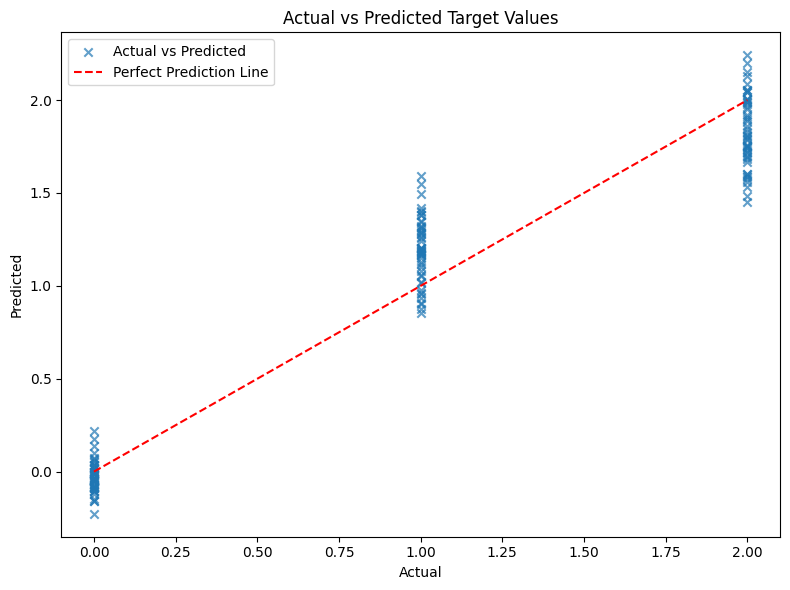

In [ ]:
# Plot actual values vs predicted values

plt.figure(figsize = (8,6))
plt.scatter(y, y_predicted,marker="x",alpha = 0.7, label = "Actual vs Predicted")
plt.plot([0,2],[0,2],color="red",label = "Perfect Prediction Line", linestyle = "--")
plt.title("Actual vs Predicted Target Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.show()

##### The above scatter plot is between the actual target values and predicted target values (using Linear Regression and all the input columns). The red dotted line the perfect prediction line if the model had no MSE.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [139]:
# Linear Regression model for each input column

mse_dict = {}
best_col = None
best_mse = float("inf")

x = iris_df.drop(columns = "target")
y = iris_df["target"]

for col in x.columns:
    model = sklearn.linear_model.LinearRegression()
    model.fit(x[[col]],y)
    y_pred = model.predict(x[[col]])
    mse = np.mean((y-y_pred)**2)
    mse_dict[col] = mse
    if mse<best_mse:
        best_col = col
        best_mse = mse

print("Mean Squared Error for each input column :")
for c,m in mse_dict.items():
    print(f"{c} : {m}")

print("Best input column for Linear Model :", best_col)
print("Best Mean Squared Error :", best_mse)

Mean Squared Error for each input column :
sepal-length : 0.2583986123119253
sepal-width : 0.5493765900582834
petal-length : 0.06621216537347081
petal-width : 0.05678463583919234
Best input column for Linear Model : petal-width
Best Mean Squared Error : 0.05678463583919234


##### Single Input column which gives best linear model of the Target : petal-width

##### The Mean Squared Error for linear Model with single input column petal-width = 0.05678463583919234

##### The Mean Squared Error when using all input columns in Linear Model (Problem 5) = 0.046385088311226945

##### <ins>**Conclusion**</ins> = The best single input column for linear model is petal_width. As we can see, there isn't much difference between only using petal-width as input versus using all the input columns. This shows petal-width is on itself highly predictive of  species of flower, while combining all the four features captures additional variance and provides a better fit.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [140]:
# Correlation matrix for proof

correlation_matrix = iris_df.corr()
print(correlation_matrix)


              sepal-length  sepal-width  petal-length  petal-width    target
sepal-length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal-width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal-length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal-width       0.817954    -0.356544      0.962757     1.000000  0.956464
target            0.782561    -0.419446      0.949043     0.956464  1.000000


##### By calculating the Pearson Correlation Coefficients for the Iris dataset, we see that petal-length and petal-width have a high dependence with score 0.962757 and let us use these 2 columns for this problem. We can further prove their dependence by plotting them visually.

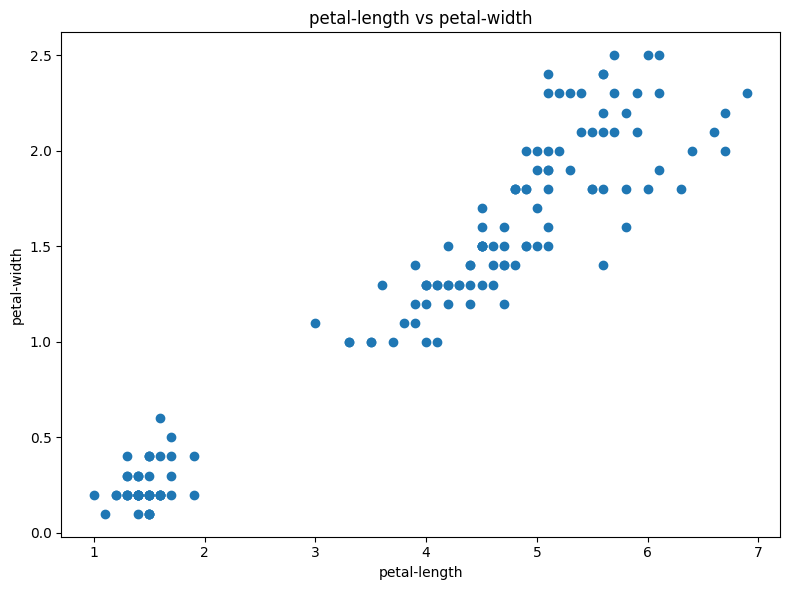

In [141]:
plt.figure(figsize = (8,6))
plt.scatter(iris_df["petal-length"], iris_df["petal-width"])
plt.title("petal-length vs petal-width")
plt.xlabel("petal-length")
plt.ylabel("petal-width")
plt.tight_layout()
plt.show()

##### We see a clear upward trend, as petal-length increases so does petal-width. Thus they are highly dependent on each other.

##### Let us split the column petal-length at threshold t = 2.5 and see how the histograms of petal-width look on either side of the threshold.

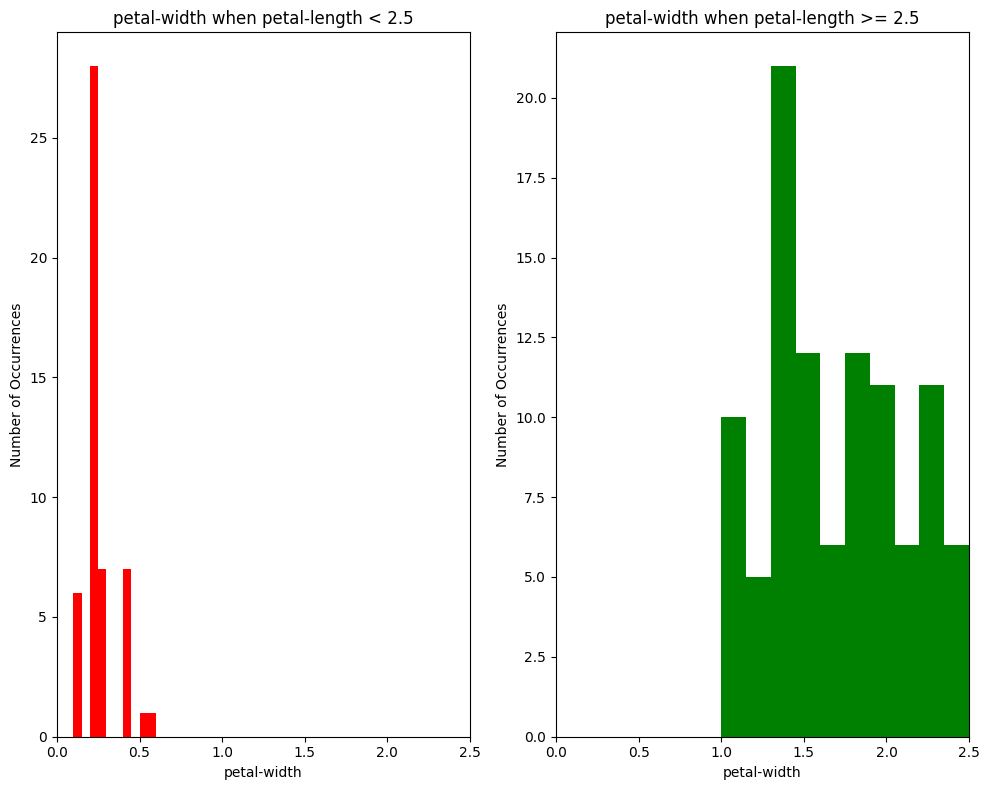

In [142]:
t = 2.5

less_than_threshold = iris_df[iris_df["petal-length"] < t]["petal-width"]
greater_than_threshold = iris_df[iris_df["petal-length"] >= t]["petal-width"]

plt.figure(figsize = (10,8))

plt.subplot(1,2,1)
plt.hist(less_than_threshold, color = "red")
plt.title(f"petal-width when petal-length < {t}")
plt.xlabel("petal-width")
plt.ylabel("Number of Occurrences")
plt.xlim(0, iris_df["petal-width"].max())

plt.subplot(1,2,2)
plt.hist(greater_than_threshold, color = "green")
plt.title(f"petal-width when petal-length >= {t}")
plt.xlabel("petal-width")
plt.ylabel("Number of Occurrences")
plt.xlim(0, iris_df["petal-width"].max())

plt.tight_layout()
plt.show()

##### The left histogram (petal-length < 2.5) shows that petal-width varies between 0.1 - 0.6 and a huge cluster between approximatelty 0.2-0.3 (The left histogram corresponds to Setosa flower). The right histogram (petal-length >= 2.5) shows that petal-width varies between 1.0 - 2.5 (The right histogram corresponds to Versicolor and Virginica flowers). The two histograms look significantly different which proves a strong dependency between petal-length and petal-width.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [143]:
# Perform PCA and find Variation per Prinicipal Component
from sklearn.preprocessing import StandardScaler

x_p8 = iris_df.drop(columns = "target")
y_p8 = iris_df["target"]

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x_p8)

pca = PCA()
x_pca = pca.fit_transform(x_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
first_half = x_p8.shape[1]//2
explained_first = explained_variance_ratio[:first_half].sum()

print("Variance explained per Principal Component :", explained_variance_ratio)
print("Variance explained by first half Principal components: ", explained_first)

Variance explained per Principal Component : [0.72770452 0.23030523 0.03683832 0.00515193]
Variance explained by first half Principal components:  0.9580097536148198


##### The Variation explained by the Four Principal Components : [0.72770452 0.23030523 0.03683832 0.00515193].

##### The Data Variation Explained by First Half of the Principal Components (PC1 + PC2) : 0.9580097536148198 (95.80% of the total variance).

##### PCA is really effective in the case of this dataset, as we retain most of the information by using PC1 and PC2.

In [144]:
# Linear Regression for original data

model_orig = sklearn.linear_model.LinearRegression()
model_orig.fit(x_p8,y_p8)
y_pred_orig = model_orig.predict(x_p8)
mse_orig = np.mean((y_p8 - y_pred_orig)**2)
print("The Mean Squared Error using original data :", mse_orig)

The Mean Squared Error using original data : 0.046385088311226945


In [145]:
#Linear Regression using first half principal components

x_dimension_reduced = x_pca[:,:first_half]

model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(x_dimension_reduced,y_p8)
y_pred_pca = model_pca.predict(x_dimension_reduced)
mse_pca = np.mean((y_p8 - y_pred_pca)**2)
print("The Mean Squared Error using first half principal components :", mse_pca)

The Mean Squared Error using first half principal components : 0.07146725091639042


##### The Model from before (Problem 5) had a Mean Squared Error of 0.046385088311226945

##### The Mean Squared Error when using first half Principal Components is 0.07146725091639042

##### <ins>**Comparison:**</ins>

a) The PCA based regression model using first half prinicpal components has higher MSE than the full feature regression.

b) The slightly higher MSE is because we are only using PC1 and PC2. Eventhough PC1 + PC2 captures 95.80% of the variance of the data, the remaining principal components (PC3 and PC4) contain useful predictive information.

c) This process of dimensionality reduction in PCA results in tradeoff between accuracy for simplicity.

d) On observation, the increase in MSE from original model to PCA model is modest. This shows that PC1 and PC2 captures most of variance required for prediction.

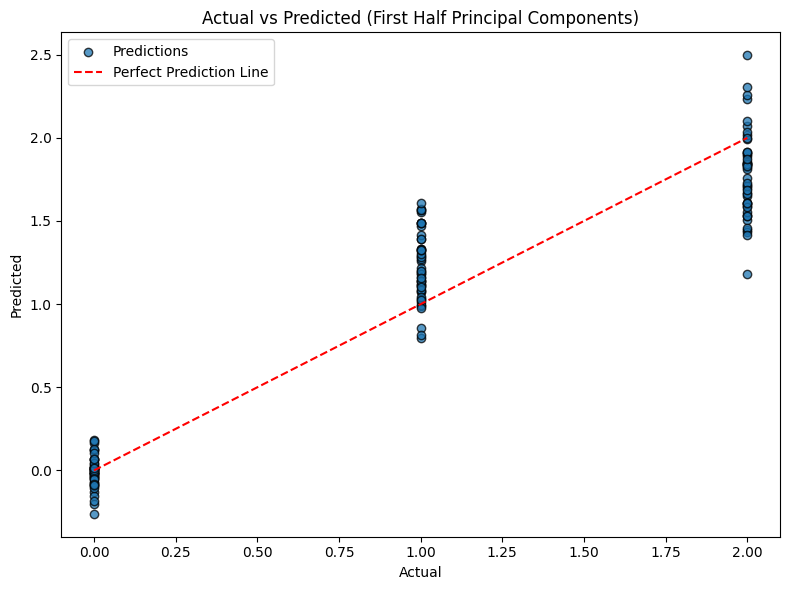

In [146]:
# Plot for pca-model

plt.figure(figsize = (8,6))
plt.scatter(y_p8, y_pred_pca, edgecolor = "black", alpha = 0.75, label = "Predictions")
plt.plot([y_p8.min(),y_p8.max()], [y_p8.min(),y_p8.max()], linestyle = "--", color = "red", label = "Perfect Prediction Line")
plt.title("Actual vs Predicted (First Half Principal Components)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.tight_layout()
plt.show()

##### The above scatter plot is between the actual target values and predicted target values (using first half Principal Components). The red dotted line the perfect prediction line if the model had no MSE.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

The correlation matrix for input columns is :
              sepal-length  sepal-width  petal-length  petal-width
sepal-length      1.000000    -0.109369      0.871754     0.817954
sepal-width      -0.109369     1.000000     -0.420516    -0.356544
petal-length      0.871754    -0.420516      1.000000     0.962757
petal-width       0.817954    -0.356544      0.962757     1.000000


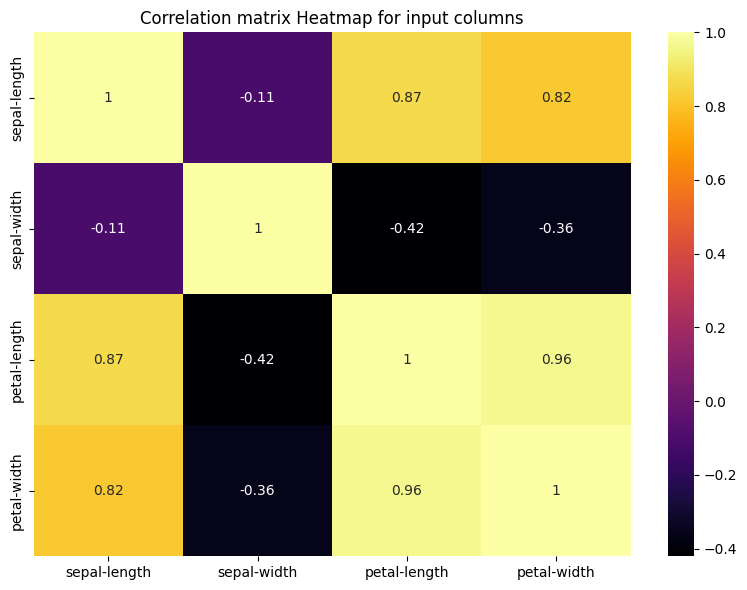

In [147]:
# Finding Correlation Matrix
import seaborn as sns

x_corr = iris_df.drop(columns = "target")

corr_matrix = x_corr.corr()
print("The correlation matrix for input columns is :")
print(corr_matrix)

# Heatmap to visualize the correlation

plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, cmap = "inferno", annot = True)
plt.title("Correlation matrix Heatmap for input columns")
plt.tight_layout()
plt.show()

##### By calculating the Pearson Correlation Coefficients for the Iris dataset and observing the heatmap, we see that petal-length and petal-width have the highest correlation with score 0.962757

In [148]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

##### pca.components_ gives us an output of an array in which each row is a principal component and each column corresponds to features in the order [sepal-length, sepal-width, petal-length, petal-width]. Let us analyze each principal component with respect to petal-length and petal-width (pair with highest correlation).

##### **1) PC1 = [ 0.52237162, -0.26335492,  0.58125401,  0.56561105]**

a) Both petal-length (0.58125401) and petal-width (0.56561105) have a strong positive weights.

b) This tells us that PC1 is dominated by the highly correlated pair, and their shared variance is compressed into one single axis.

c) In other words, PC1 is essentially measuring the overall petal size as it is a nearly equal combination of petal-length and petal-width, with some contribution from sepal-length as well.

##### **2) PC2 = [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]**

a) Sepal-width (0.92555649) has very strong positive weight compared to others.

b) This tells us that PC2 is dominated by sepal-width, which means it captures variance independent to the petal measurements. 

##### **3) PC3 = [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ]**

a) Sepal-length (0.72101681) and petal-width (-0.6338014) have the strongest weights, but in opposite directions.

b) This tells us that PC3 is essentially measuring a trade-off between sepal-length and petal-width.

##### **4) PC4 = [-0.26199559,  0.12413481,  0.80115427, -0.52354627]**

a) Petal-length (0.80115427) and petal-width (-0.52354627) have the strongest weights, but in opposite directions.

b) This tells us that PC3 is essentially finding cases where petal-length is large relative to petal-width and vice versa.


In [149]:
print("Variance explained per Principal Component :", pca.explained_variance_ratio_)

Variance explained per Principal Component : [0.72770452 0.23030523 0.03683832 0.00515193]


##### pca.explained_variance_ratio_ gives us the variance explained by each principal component.

#####  The first principal component PC1 captures almost 73% of the total variance. The strongest correlation in the dataset is between petal-length and petal-width (0.962757).

##### Since these two features are so highly correlated, PCA combines their shared variation into a single dominant direction (PC1). The fact that petal-length and petal-width have strong correlation is the reason why PC1 alone explains 73% of the variance in the dataset.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

##### I am using the Z-score criteria to find the outlier(s).

##### The formula for z-score is

### z = $\frac{x - u}{std}$ 
where x = observation, u = mean, std = standard deviation

##### In Z-score method, we standardize each feature and flag rows where any features z-score is > 3 or < -3. This means ,

1) We compute z-scores for every feature. 
2) Then we identify rows where atleast one feature has z >3 or z < -3.
3) Consider those rows as outliers.

In [150]:
# Calculate Z-scores and Find Outlier row(s)

data = iris_df.drop(columns = "target")

z_score = np.abs(scipy.stats.zscore(data))
outlier_indices = np.where(z_score > 3)[0]
outlier_column = np.where(z_score > 3)[1]

print("The outlier row indices is", outlier_indices)
print("The outlier row is ")
print(iris_df.iloc[outlier_indices])
print("The column number causing the outlier:", outlier_column)

The outlier row indices is [118]
The outlier row is 
     sepal-length  sepal-width  petal-length  petal-width  target
118           5.7          4.4           1.5          0.4       0
The column number causing the outlier: [1]



##### np.where(z_score > 3) returns two arrays, first array is row indices where condition is true and second array is column indices where condition is true. From this we learn that columns [1], or in this case sepal-width is causing the outlier.

##### Let us calculate the mean and standard deviation of sepal-width.

In [151]:
sepal_width_mean = iris_df["sepal-width"].mean()
sepal_width_std = np.std(iris_df["sepal-width"])

print("The mean of sepal-width:", sepal_width_mean)
print("The standard deviation of sepal-width:", sepal_width_std)

The mean of sepal-width: 3.0540000000000003
The standard deviation of sepal-width: 0.4321465800705435


##### The required values are x = 4.4 (Outlier), u = 3.05 and std = 0.43

##### z = $\frac{4.4 - 3.05}{0.43}$ = 3.139

##### This shows this outlier with sepal_width = 4.4 is 3 standard deviations above the mean. That is why the Z-score criteria chose this row as an outlier.

##### The row with indice 118 is the outlier and has the following dimensions:
a) sepal-length = 5.7

b) sepal-width = 4.4

c) petal-length = 1.5

d) petal-width = 0.4

Let us plot histograms for each input column to get a visual idea for which column is responsible for this outlier.

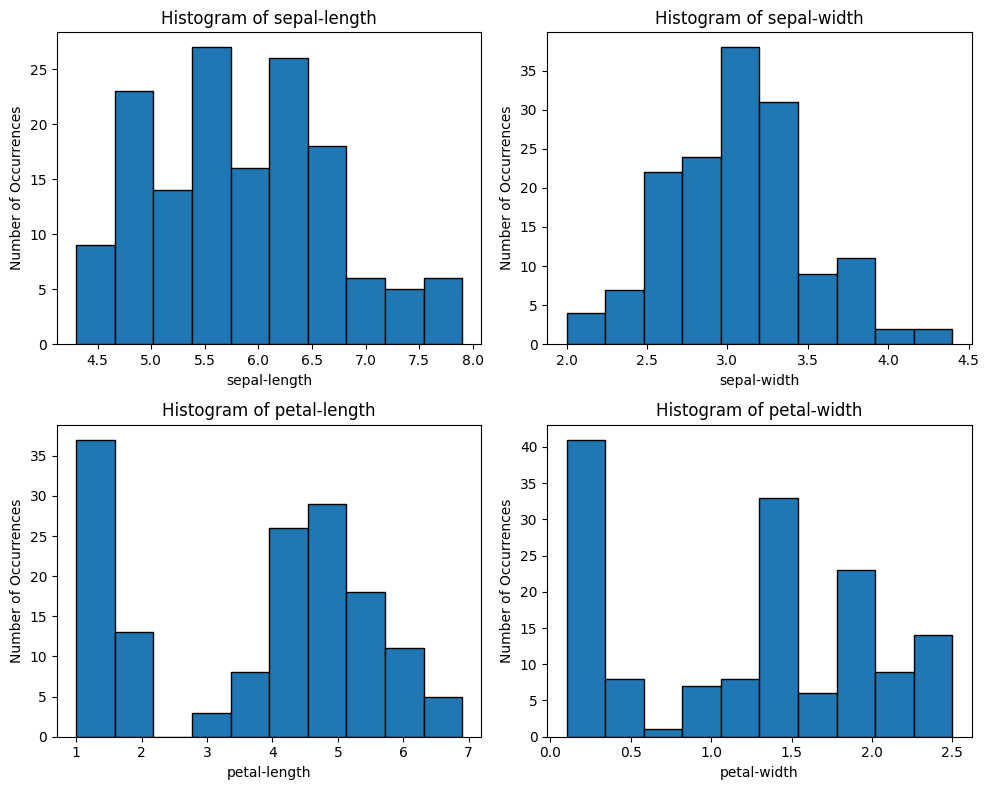

In [152]:
plt.figure(figsize = (10,8))

for i,col in enumerate(data.columns,1):
    plt.subplot(2,2,i)
    plt.hist(data[col], edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Occurrences")

plt.tight_layout()
plt.show()

##### If we observe the above histograms, the values of the outlier row for sepal-length, petal-length and petal-width lie within the normal ranges of their respective columns. But in the case of sepal-width, the outlier row data appears as a lonely bar at the edge of the graph. Hence, we can say that sepal-width is the column that is causing that row to be identifies as an outlier.

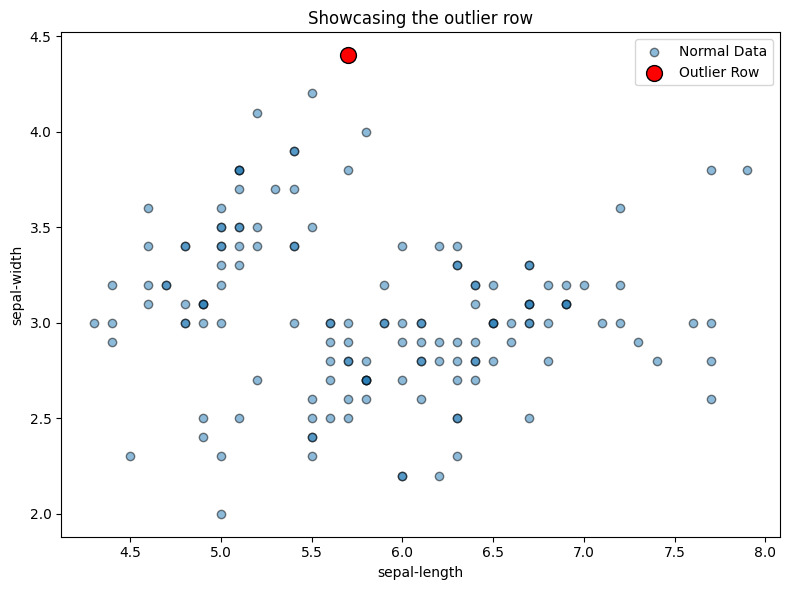

In [153]:
plt.figure(figsize = (8,6))
plt.scatter(iris_df["sepal-length"],iris_df["sepal-width"], edgecolor = "black", alpha =0.5, label = "Normal Data")
plt.scatter(iris_df.iloc[outlier_indices]["sepal-length"],iris_df.iloc[outlier_indices]["sepal-width"], color = "red", edgecolor = "black", s = 130, label = "Outlier Row")
plt.title("Showcasing the outlier row")
plt.xlabel("sepal-length")
plt.ylabel("sepal-width")
plt.tight_layout()
plt.legend()
plt.show()

##### Observe the above scatter plot between sepal-length and sepal-width. While the sepal-length for the outlier row is within the normal range, the sepal-width value is unusually high. This causes the point representing the outlier row to lie apart from the rest of the data.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

Used generative AI and google articles to learn and revise about different distributions for problem 3. After learning, tried to match the various distributions to the histograms of the columns to the best of my ability.